# Лабораторная работа №1
### Оценивание параметров линейного стационарного объекта методом наименьших квадратов

Линейный регрессионный объект имеет вид:
\begin{equation}y(i)=b_{0}u_{0}(i)+b_{1}u_{1}(i)+...+b_{m}u_{m}(i)+\eta(i)\end{equation}

Соответствующая ему модель:
\begin{equation}\tilde{y}(i)=\tilde{b}_{0}u_{0}(i)+\tilde{b}_{1}u_{1}(i)+...+\tilde{b}_{m}u_{m}(i)\end{equation}

#### Моделирование работы объекта

В работе будет рассматриваться линейный регрессионный объект с 4 входами. Значения параметров \begin{equation}b_{0}, b_{1}, b_{2}, b_{3}, b_{4}\end{equation} должно быть задано в соответствии с вашим вариантом №(указать вариант): 

In [ ]:
import numpy as np
import math as m

In [ ]:
# variant 7
b = np.array([2,4,7,3,5])
b

array([2, 4, 7, 3, 5])

В качестве «входов» имитируемого объекта используются псевдослучайные **нормально распределенные** числа, 
получаемые от генератора псевдослучайных **нормально распределенных** чисел. 

Задайте параметры распределения для генерации «входов» объекта:

In [ ]:
# input parameters
U_gen_mean = np.array([2,3,5,7])
U_gen_var = np.array([0.5,20,50])

Выберите желаемый объем измерений (размерность i-ого входа), который будет сымитирован:

In [ ]:
N=120
max_var_ratio = 1.35

Пусть «шум», действующий на объект, тоже **нормально распределен**.
Задайте параметры его распределения:

In [ ]:
eta_gen_mean = np.array([0,0,0,3])
eta_gen_var = np.array([0.5,10,20,0.5])

Cформируем «входы» объекта и действующий на него шум: 

In [ ]:
#input
U = np.zeros(
   (eta_gen_var.size, # eta type
    U_gen_var.size,   # var(U) type
    U_gen_mean.size,  # U_i
    N)                # experiment number
)

#noise
eta = np.zeros(
    (eta_gen_var.size, # eta type
     N)                # experiment number
)


In [ ]:
# all input values for all N experiments
for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    for i_mean in range(U_gen_mean.size):
      U[i_eta,i_var,i_mean,:] = np.random.normal(loc=U_gen_mean[i_mean], scale = m.sqrt(U_gen_var[i_var]), size=N)
U.shape

(4, 3, 4, 120)

In [ ]:
# all noise values for all N experiments
for i_eta in range(eta_gen_var.size):
      eta[i_eta,:] = np.random.normal(loc=eta_gen_mean[i_eta], scale = m.sqrt(eta_gen_var[i_eta]), size=N)
eta.shape

(4, 120)

Теперь задание исходных данных для имитационного моделирования объекта завершено. Проведем моделирование сформированного объекта:

In [ ]:
#y=b0+b1*U1+b2*U2+b3*U3+b4*U4+Noise
def output(u,b,eta):
  return np.dot(u,b[1:])+b[0]+eta

In [ ]:
# output
y = np.zeros(
   (eta_gen_var.size, # eta type
    U_gen_var.size,   # var(U) type
    N)                # experiment number
)

In [ ]:
# all output values for all N experiments
for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    for i_N in range(N):
      #print(U[i_eta,i_var,:, i_N], b)
      y[i_eta,i_var, i_N] = output(U[i_eta,i_var,:, i_N], b, eta[i_eta,i_N])
y.shape

(4, 3, 120)

####Центрирование

In [ ]:
U_c = np.zeros(U.shape)
y_c = np.zeros(y.shape)

for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    for i_mean in range(U_gen_mean.size):
      c = np.mean(U[i_eta,i_var,i_mean,:])
      for i_N in range(N):
        U_c[i_eta,i_var,i_mean,i_N] = U[i_eta,i_var,i_mean,i_N]-c

for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    c = np.mean(y[i_eta,i_var,:])
    for i_N in range(N):
      y_c[i_eta,i_var,i_N] = y[i_eta,i_var,i_N]-c


#### Формирование алгоритма МНК

Методу наименьших квадратов соответствует квадратичная функция потерь. 
Для объекта с одним выходом эта функция имеет вид:
\begin{equation}F(\epsilon(i,\vec{\tilde{b}}))=(y(i) - \tilde{y}(i, \vec{\tilde{b}}))^2\end{equation}
Критерий качества в векторной форме:
\begin{equation}J(\vec{\tilde{b}})=( \vec{y} -\vec{\tilde{y}})^T(\vec{y}-\vec{\tilde{y}}) \end{equation}

Для нахождения оценки параметров, обеспечивающей минимум критерия качества, т.е. 
$\frac{\partial J(\vec{\tilde{b}})}{\partial \vec{\tilde{b}}}\biggr\rvert_{\vec{\tilde{b}} = \vec{\hat{b}_{LS}}} = 0$
необходимо решить уравнение:
$\vec{\hat{b}_{LS}}=(U^TRU)^{-1}U^TR\vec{y}$

Сформируйте матрицу $U$, состоящую из "входов" $U_i$, и найдите оценку параметров объекта по МНК.
Используйте функционал библиотеки numpy для работы с матрицами.

In [ ]:
def U_matr(U,i_eta,i_var):
  return np.transpose(U[i_eta,i_var,:,:])

def y_vec(y, i_eta,i_var): #column
  return np.transpose(np.array([y[i_eta,i_var,:]]))

#U_matr(U,1,1)

In [ ]:
def LS(U,R,y):
  Ut = np.transpose(U)
  UtR =  Ut.dot(R)
  UtRU = UtR.dot(U)
  UtRU_inv = np.linalg.inv(UtRU)
  UtRU_invUtR = (UtRU_inv.dot(Ut)).dot(R)
  return UtRU_invUtR.dot(y)

def b0(y_m, u_m, b_est):
  return y_m - u_m.dot(b_est)

In [ ]:
b_est = np.zeros(
   (eta_gen_var.size, # eta type
    U_gen_var.size,   # var(U) type
    b.size)  # b_i
)

#### Оценки параметров $b_0...b_4$

In [ ]:
for i_eta in range(eta_gen_var.size):
 for i_var in range(U_gen_var.size):
  b_est[i_eta,i_var,1:] = np.transpose( LS(U_matr(U_c,i_eta,i_var),np.eye(N),y_vec(y_c,i_eta,i_var)) )
  #b0
  y_m = np.mean(y[i_eta,i_var,:])
  u_m = np.zeros(U_gen_mean.size)
  for i_mean in range(U_gen_mean.size):
      u_m[i_mean] = np.mean(U[i_eta,i_var,i_mean,:])
  b_est[i_eta,i_var,0] = b0(y_m, u_m, b_est[i_eta,i_var,1:])
print(b_est)    

[[[3.17463611 3.91245318 7.04495631 2.96764127 4.85583219]
  [1.93711897 4.00455015 7.0028853  2.97172456 5.02469012]
  [1.87167866 4.00699067 6.99802647 2.99456543 5.01589482]]

 [[1.95534751 3.63332444 6.77215883 2.74080485 5.36871672]
  [2.30033249 3.93406157 7.05961787 2.9315291  4.96607693]
  [1.42122189 4.05570088 7.01508668 3.02291779 5.01364228]]

 [[8.78985533 3.14571024 6.30077982 3.42424612 4.34173214]
  [2.99886447 3.87255517 6.7466875  3.14202159 4.97944434]
  [1.80543396 4.05106831 6.9624763  3.07620432 5.03023607]]

 [[5.4701848  4.16706915 6.93199437 2.95715982 4.94596739]
  [5.14319081 3.99622617 7.00405737 2.98497679 4.99160789]
  [4.9430517  3.99906824 7.00726913 2.99425582 5.00941133]]]


#### По выше реализованному алгоритму МНК  должно быть исследовано следующее:

1) зависимость точности оценки параметров b0, b1, b2, b3, b4 от дисперсии шума измерений ση2  и дисперсии «входных» параметров σu.

2) влияние математического ожидания шума измерений μη на точность оценки

3) проверка по критерию Фишера адекватности модели тестовому объекту.

Указания к проведению данных пунктов находятся в лаборатоном практикуме.

In [ ]:
err = np.zeros((eta_gen_var.size,U_gen_var.size,b.size+1))
for i_eta in range(eta_gen_var.size):
 for i_var in range(U_gen_var.size):
   err2 = 0
   for i_b in range(b.size):
     err[i_eta,i_var,i_b] = m.fabs(b_est[i_eta,i_var,i_b]-b[i_b])
     err2 = err2+err[i_eta,i_var,i_b]**2
   err[i_eta,i_var,i_b+1] = err2/b.size
err = err.reshape((12,6))

#### Все оценки и функция потерь

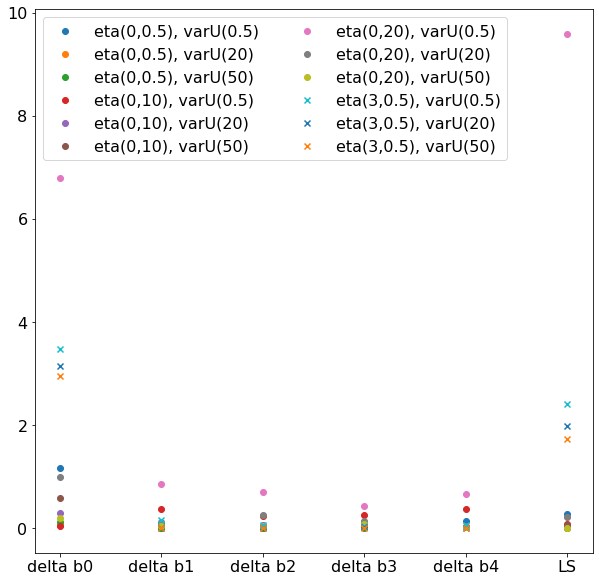

<Figure size 800x800 with 0 Axes>

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

fig, ax = plt.subplots()
plt.figure(figsize=(10,10), dpi= 80)
position = np.arange(6)

for i in range(12):
  ax.scatter(position,err[i,:], label=df.index.values[i],  marker = 'x' if i>8 else 'o')

ax.set_xticks(position)
ax.set_xticklabels(df.columns)
fig.set_figwidth(10)
fig.set_figheight(10)
ax.legend(ncol=2)
plt.show()

#### Оценки параметров b1...b4

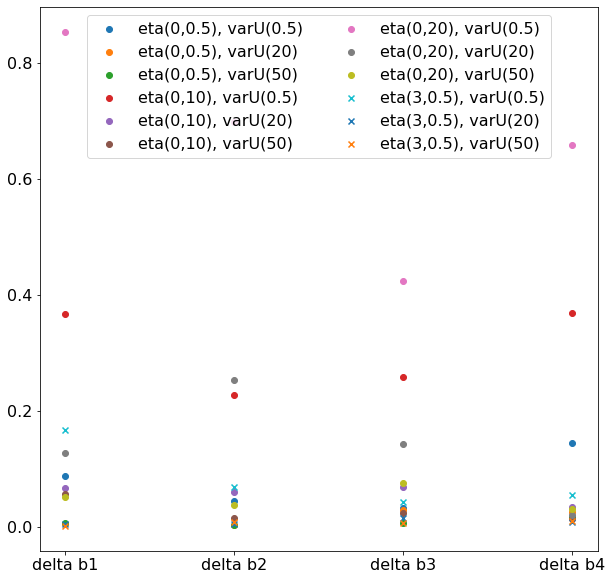

In [ ]:
fig, ax = plt.subplots()
position = np.arange(4)

for i in range(12):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], marker = 'x' if i>8 else 'o')

ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])

fig.set_figwidth(10)
fig.set_figheight(10)
ax.legend(ncol=2)
plt.show()

#### Сравнение оценок $b_0...b_4$ по разбросу входов $u$ при одинаковом распределении шума $\eta$

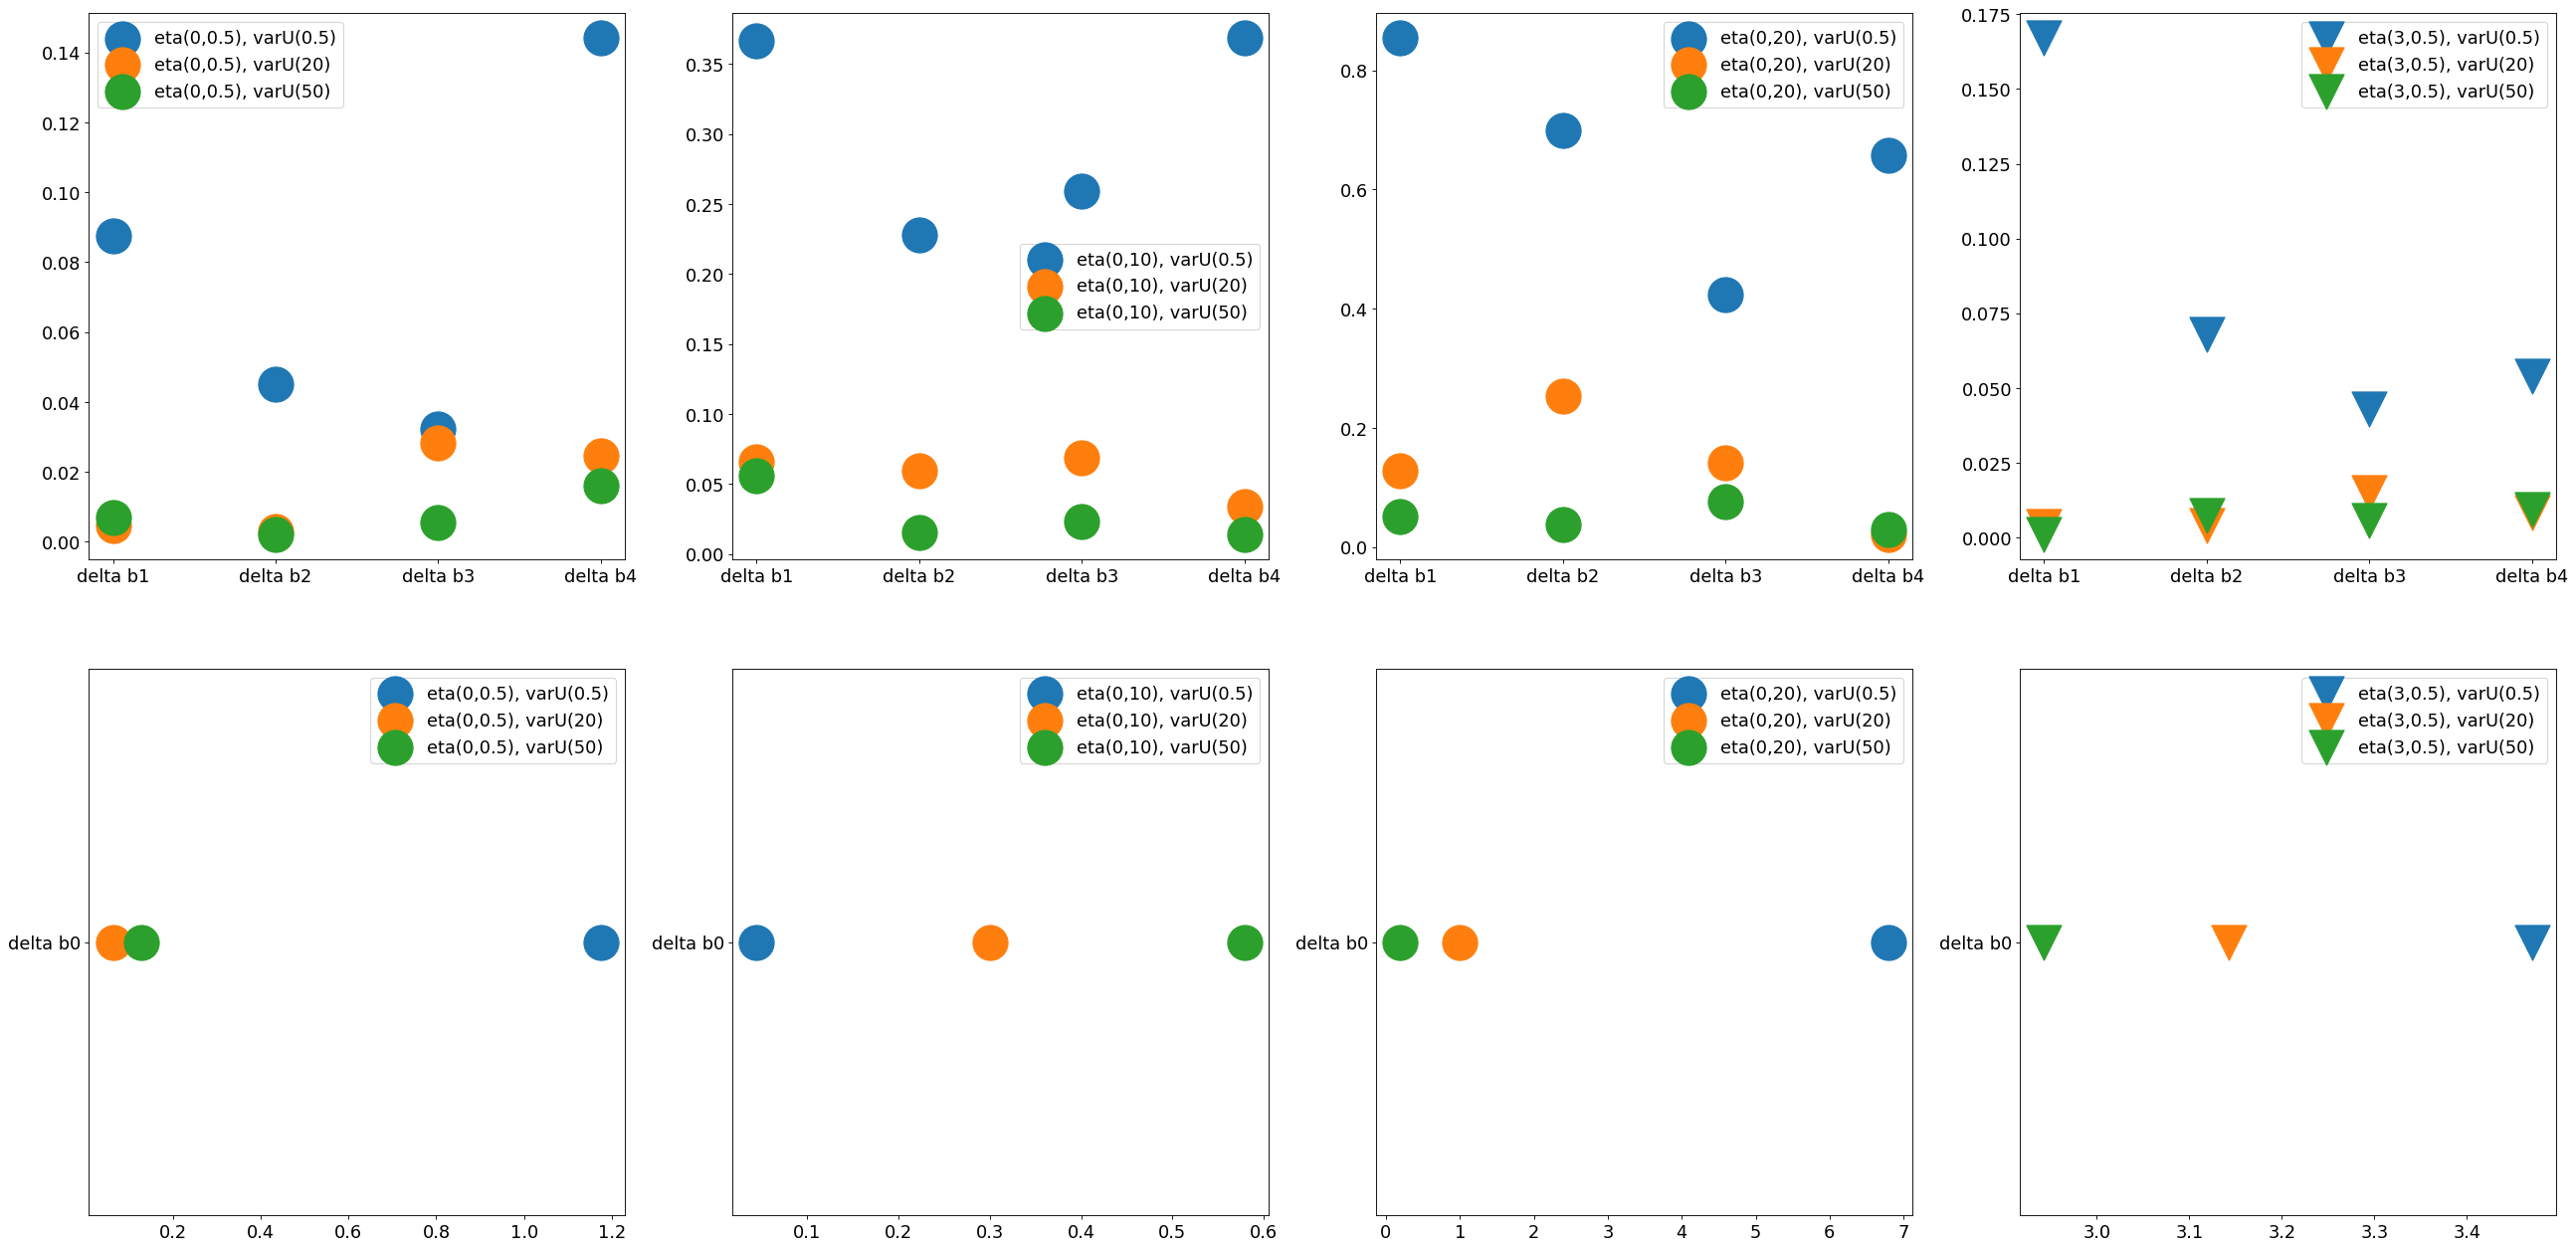

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4)

position = np.arange(4)

ax = axs[0][0]
for i in range(3):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][0]
for i in range(3):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

ax = axs[0][1]
for i in range(3,6):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][1]
for i in range(3,6):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

ax = axs[0][2]
for i in range(6,9):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][2]
for i in range(6,9):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

ax = axs[0][3]
for i in range(9,12):
  ax.scatter(position,err[i,1:5], label=df.index.values[i],  marker = 'v', s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][3]
for i in range(9,12):
  ax.scatter(err[i,0],[0], label=df.index.values[i],   marker = 'v', s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

fig.set_figwidth(40)
fig.set_figheight(20)
fig.set_dpi(80)
plt.show()

#### Сравнение оценок $b_0...b_4$ по распределению шума $\eta$ при одном разбросе входов $u$

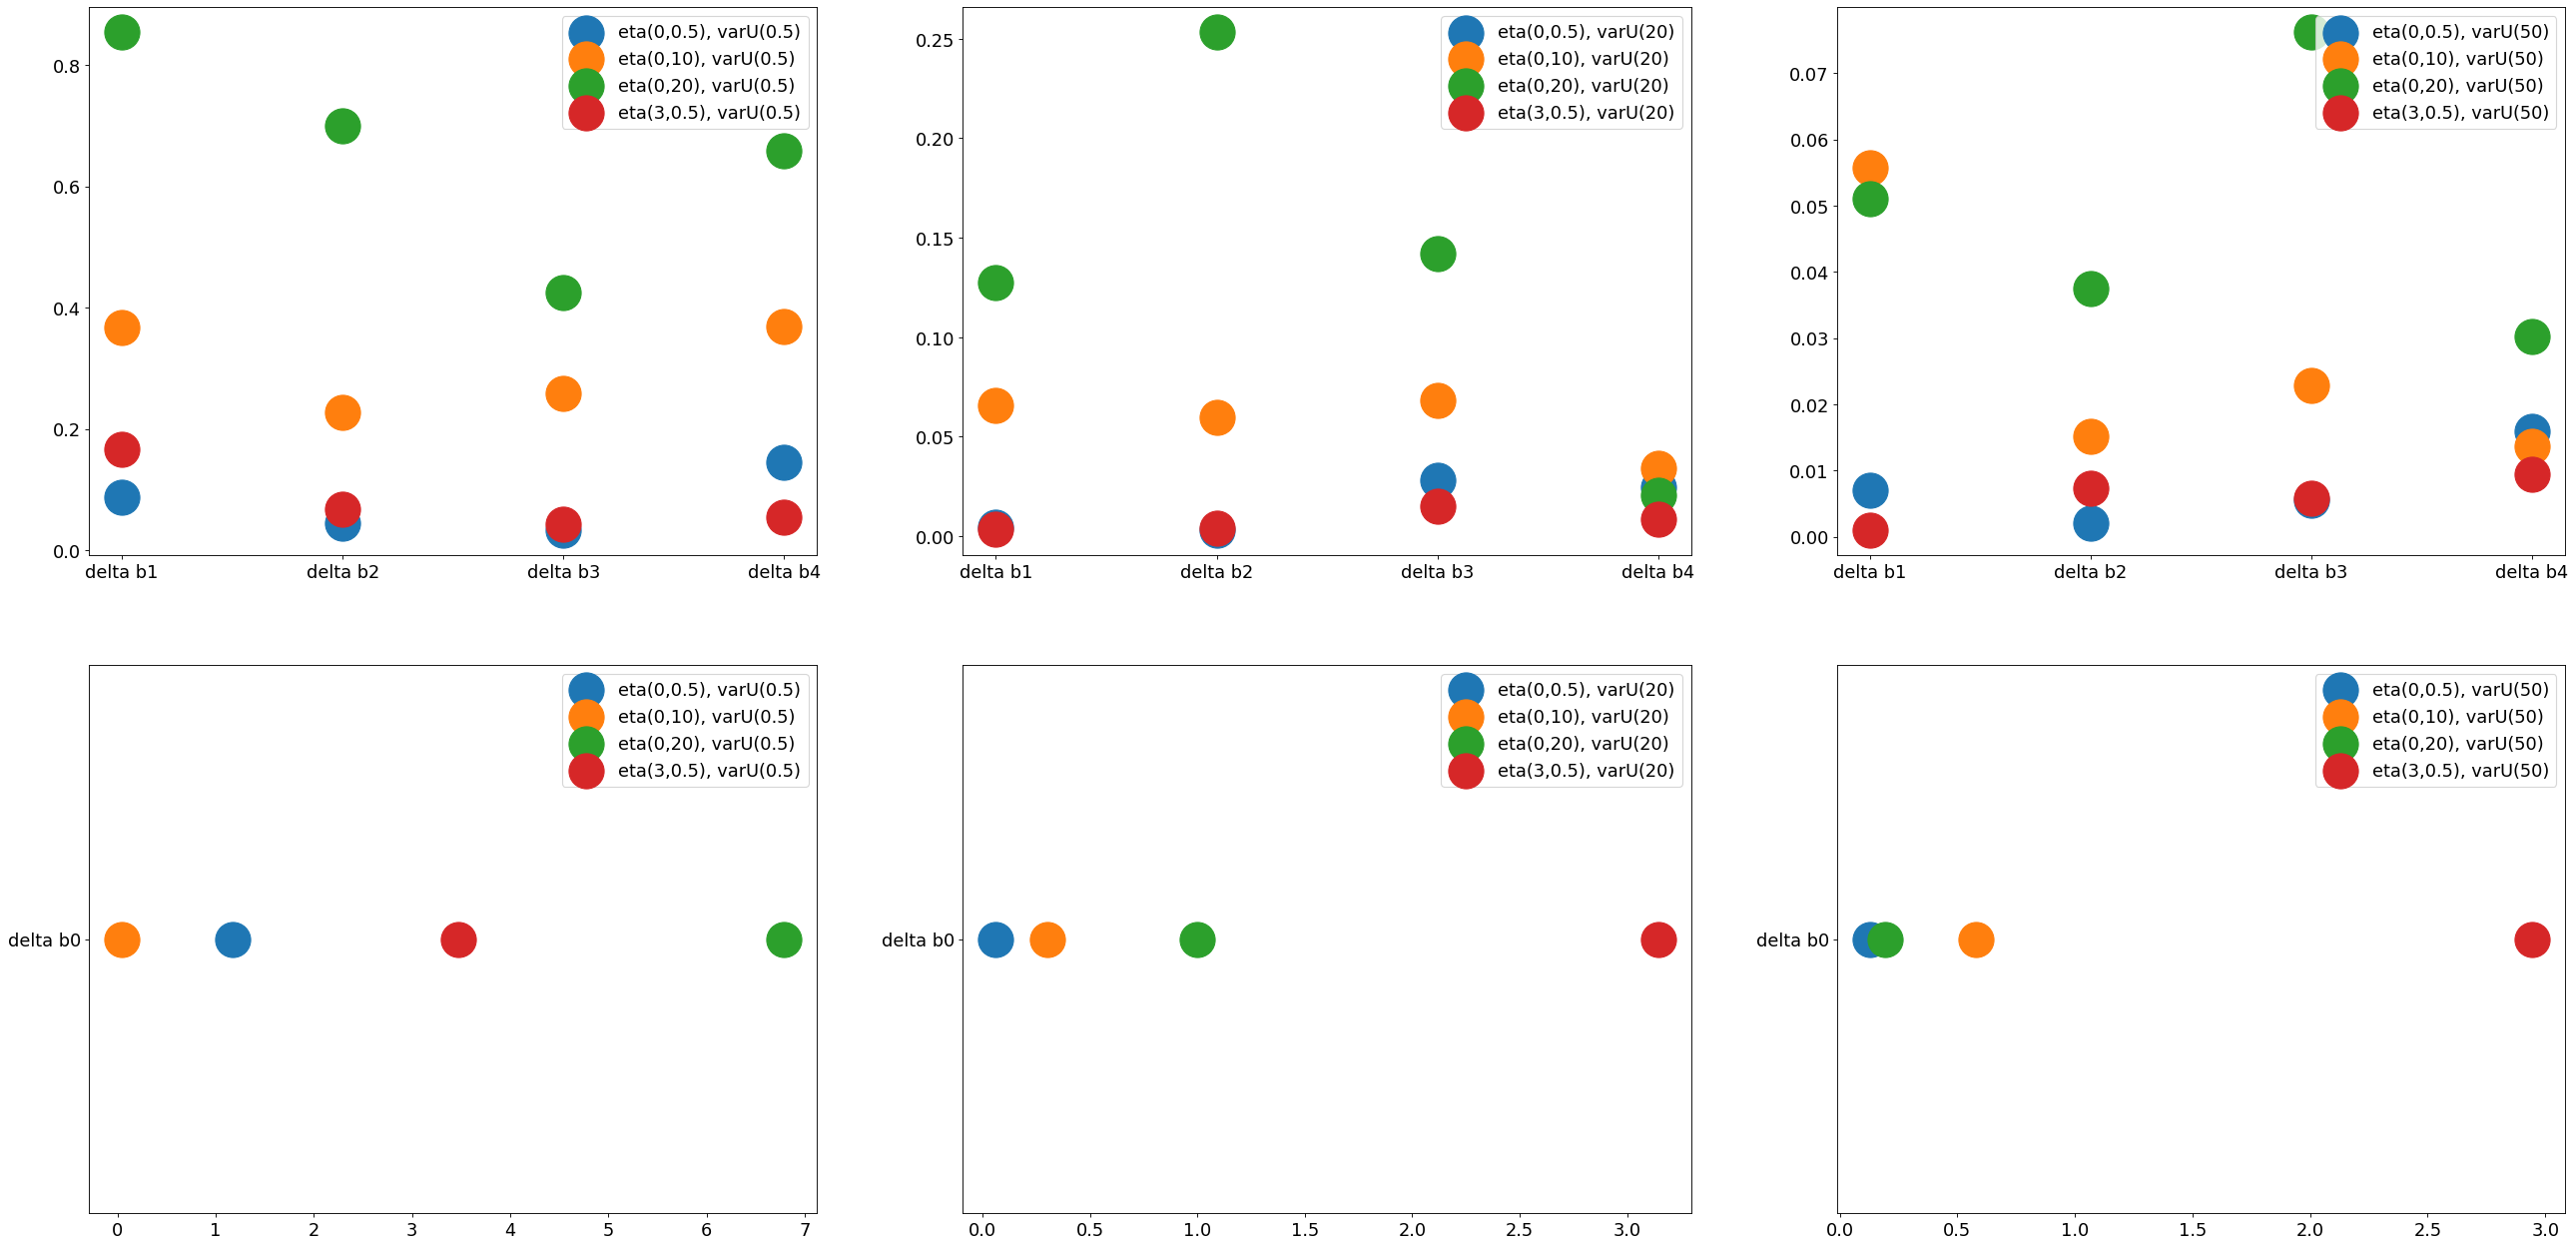

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3)

position = np.arange(4)

ax = axs[0][0]
for i in range(0,12,3):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][0]
for i in range(0,12,3):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

ax = axs[0][1]
for i in range(1,12,3):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][1]
for i in range(1,12,3):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

ax = axs[0][2]
for i in range(2,12,3):
  ax.scatter(position,err[i,1:5], label=df.index.values[i], s=1e3)
ax.set_xticks(position)
ax.set_xticklabels(df.columns[1:5])
ax.legend(prop={"size":16})
ax = axs[1][2]
for i in range(2,12,3):
  ax.scatter(err[i,0],[0], label=df.index.values[i], s=1e3)
ax.set_yticks([0])
ax.set_yticklabels({'delta b0'})
ax.legend(prop={"size":16})

fig.set_figwidth(40)
fig.set_figheight(20)
fig.set_dpi(80)
plt.show()

#### Проверка адекватности модели

In [ ]:
var_y = np.zeros((eta_gen_var.size,U_gen_var.size))
for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    var_y[i_eta,i_var] += np.var(y_c[i_eta,i_var,:])
var_model =  np.zeros((eta_gen_var.size,U_gen_var.size))
for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    var_model[i_eta,i_var] = np.var( b_est[i_eta,i_var,1:].dot(
        np.transpose(U_matr(U_c,i_eta,i_var)) ) )
    
var_ratio = np.zeros((eta_gen_var.size,U_gen_var.size))
for i_eta in range(eta_gen_var.size):
  for i_var in range(U_gen_var.size):
    var_ratio[i_eta, i_var] = var_model[i_eta,i_var]/var_y[i_eta,i_var] if var_model[i_eta,i_var] > var_y[i_eta,i_var] else var_y[i_eta,i_var]/var_model[i_eta,i_var] 
#var_ratio

**После выполнения лабораторной работы необходимо написать краткий отчет, который должен включать в себя:**
    - титульный лист
    - оглавление
    - описание моделируемого объекта
    - математические выкладки о применении МНК для оценки параметров моделируемого объекта
    - выводы о зависимости точности оценки параметров b0, b1, b2, b3, b4 от дисперсии шума измерений и дисперсии «входных» параметров,
    влияние математического ожидания шума измерений на точность оценки, проверку адекватности модели тестовому объекту по критерию Фишера.

In [ ]:
import pandas as pd
df = pd.DataFrame (err)

# better appearence
df.columns = ['delta b0','delta b1','delta b2','delta b3','delta b4','LS']
df.rename(index={0:'eta(0,0.5), varU(0.5)',1:'eta(0,0.5), varU(20)',2:'eta(0,0.5), varU(50)',
                 3:'eta(0,10), varU(0.5)',4:'eta(0,10), varU(20)',5:'eta(0,10), varU(50)',
                 6:'eta(0,20), varU(0.5)',7:'eta(0,20), varU(20)',8:'eta(0,20), varU(50)',
                 9:'eta(3,0.5), varU(0.5)',10:'eta(3,0.5), varU(20)',11:'eta(3,0.5), varU(50)',
                 }, inplace=True)
var_ratio = var_ratio.reshape(var_ratio.size,1)
df['var ratio'] = var_ratio
adeq=[]
for i in range(var_ratio.size):
  adeq.append('адекватна' if var_ratio[i] <= max_var_ratio else 'не адекватна')
df['adequacy'] = adeq
df

delta b0  delta b1  ...  var ratio      adequacy
eta(0,0.5), varU(0.5)  1.174636  0.087547  ...   1.012015     адекватна
eta(0,0.5), varU(20)   0.062881  0.004550  ...   1.000244     адекватна
eta(0,0.5), varU(50)   0.128321  0.006991  ...   1.000093     адекватна
eta(0,10), varU(0.5)   0.044652  0.366676  ...   1.149430     адекватна
eta(0,10), varU(20)    0.300332  0.065938  ...   1.004757     адекватна
eta(0,10), varU(50)    0.578778  0.055701  ...   1.001636     адекватна
eta(0,20), varU(0.5)   6.789855  0.854290  ...   1.552505  не адекватна
eta(0,20), varU(20)    0.998864  0.127445  ...   1.009726     адекватна
eta(0,20), varU(50)    0.194566  0.051068  ...   1.003791     адекватна
eta(3,0.5), varU(0.5)  3.470185  0.167069  ...   1.006881     адекватна
eta(3,0.5), varU(20)   3.143191  0.003774  ...   1.000199     адекватна
eta(3,0.5), varU(50)   2.943052  0.000932  ...   1.000076     адекватна

[12 rows x 8 columns]

In [ ]:
# save to xlsx
filepath = 'report_table.xlsx'
df.to_excel(filepath, index=False)